In [2]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import pandas as pd

from IPython.display import Image

Chapter 6 Temporal-Difference Learning
=====================

DP, TD, and Monte Carlo methods all use some variation of generalized policy iteration: primarily differences in their approaches to the prediction problem.

### 6.1 TD Prediction

constant-$\alpha$ MC: $V(S_t) \gets V(S_t) + \alpha \underbrace{\left [ G_t - V(S_t) \right ]}_{= \sum_{k=t}^{T-1} \gamma^{k-1} \theta_k}$


\begin{align}
    v_\pi(s) &\doteq \mathbb{E}_\pi [ G_t \mid S_s = s] \qquad \text{Monte Carlo} \\
             &= \mathbb{E}_\pi [ R_{t+1} + \gamma \color{blue}{v_\pi(S_{t+1})} \mid S_t = s ] \quad \text{DP}
\end{align}

one-step TD, or TD(0): $V(S_t) \gets V(S_t) + \alpha \left [ \underbrace{R_{t+1} + \gamma \color{blue}{V(S_{t+1})} - V(S_t)}_{\text{TD error: } \theta_t} \right ]$

TD: samples the expected values and uses the current estimate $V$ instead of the true $v_\pi$.


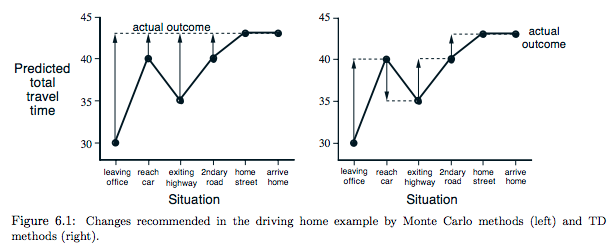

In [3]:
Image('./res/fig6_1.png')

### 6.2 Advantages of TD Prediction Methods

TD: they learn a guess from a guess - they boostrap.

+ advantage:
  1. over DP: TD do not require a model of the environment, of its reward and next-state probability distributions.
  2. over Monte Carlo: TD are naturally implemented in an online, fully incremental fashion.
  
TD: guarantee convergence.

In practice, TD methods have usually been found that converge faster than constant-$\alpha$ MC methods on stochastic tasks.

### 6.3 Optimality of TD(0)

batch updating: updates are made only after processing each complete batch of training data until the value function converges.

+ Batch Monte Carlo methods: always find the estimates that minimize mean-squared error on the training set.
+ Batch TD(0): always find the estimates that would be exactly correct for the maximum-likelihood model of the Markov process.

### 6.4 Sarsa: On-policy TD Control

$Q(S_t, A_t) \gets Q(S_t, A_t) + \alpha \left [ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t,, A_t) \right ]$